In [ ]:
import pandas as pd

# Upload the Excel file
from google.colab import files
uploaded = files.upload()

# Load the Excel file (replace with the filename you uploaded)
file_name = next(iter(uploaded))
df = pd.read_excel(file_name, engine='openpyxl')
df.head()

Saving cleaned_rice_production_for_colab.xlsx to cleaned_rice_production_for_colab (3).xlsx
Saving model_yield.pkl to model_yield (2).pkl
Saving model_gross.pkl to model_gross (2).pkl
Saving model_nett.pkl to model_nett (2).pkl


,Year,District,Sown(hect),Gross Harvested(hect),Yield(kg per hect),Nett harvetsted(hect),Total production(mt.),Season,Season_encoded,District_encoded
0,2005,COLOMBO,2263,2257,2431,1918,4663,Yala,1,4
1,2005,GAMPAHA,3487,3408,2741,2897,7938,Yala,1,6
2,2005,KALUTARA,11479,11446,2335,10559,24656,Yala,1,9
3,2005,GALLE,9414,9336,2788,7306,20369,Yala,1,5
4,2005,MATARA,14115,14103,3219,11134,35843,Yala,1,16


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode season and district
df['Season_encoded'] = LabelEncoder().fit_transform(df['Season'])
df['District_encoded'] = LabelEncoder().fit_transform(df['District'])

In [ ]:
features = ['Year', 'Season_encoded', 'District_encoded',
            'Sown(hect)', 'Gross Harvested(hect)', 'Nett harvetsted(hect)', 'Yield(kg per hect)']
target = 'Total production(mt.)'

# Drop rows with missing values
df_clean = df.dropna(subset=features + [target])

X = df_clean[features]
y = df_clean[target]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 3464.3377948717934
R² Score: 0.9919372714264058


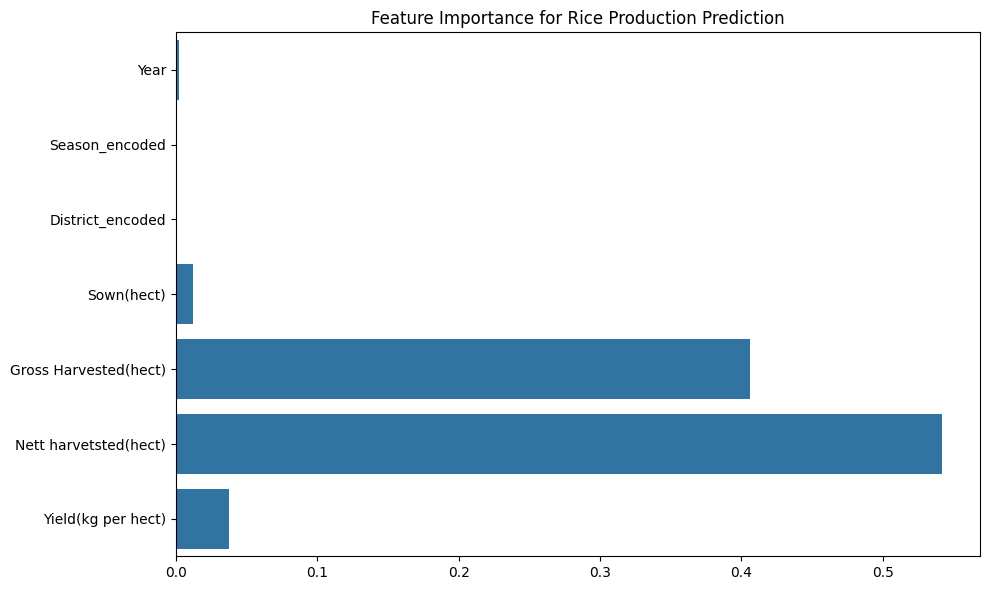

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance for Rice Production Prediction")
plt.tight_layout()
plt.show()

In [ ]:
!pip install lightgbm catboost
import joblib

# Load the models from the uploaded files
model_gross = joblib.load("model_gross.pkl")
model_nett = joblib.load("model_nett.pkl")
model_yield = joblib.load("model_yield.pkl")

# Example: predict rice production for 2025 Yala season in Polonnaruwa
example_input = pd.DataFrame([{
    'Year': 2023,
    'Season_encoded': 1,  # Assume 1 = Yala
    'District_encoded': df['District'].unique().tolist().index('COLOMBO'),
    'Sown(hect)': 2218
}])

prediction_gross = model_gross.predict(example_input)[0]
prediction_nett = model_nett.predict(example_input)[0]
prediction_yield = model_yield.predict(example_input)[0]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [ ]:
# Example: predict rice production for 2025 Yala season in Polonnaruwa
example_f_input = pd.DataFrame([{
    'Year': 2023,
    'Season_encoded': 1,  # Assume 1 = Yala
    'District_encoded': df['District'].unique().tolist().index('COLOMBO'),
    'Sown(hect)': 2218,
    'Gross Harvested(hect)': prediction_gross,
    'Nett harvetsted(hect)': prediction_nett,
    'Yield(kg per hect)': prediction_yield
}])

prediction = model.predict(example_f_input)[0]
print(f"🔮 Predicted Production for 2023 (COLOMBO - Yala): {int(prediction):,} metric tons")

🔮 Predicted Production for 2023 (COLOMBO - Yala): 8,855 metric tons
